# Μαθαίνοντας τους Αριθμούς από το Μηδέν μέχρι το Εννέα


---

> Πάνος Λουρίδας, Αναπληρωτής Καθηγητής <br />
> Τμήμα Διοικητικής Επιστήμης και Τεχνολογίας <br />
> Οικονομικό Πανεπιστήμιο Αθηνών <br />
> louridas@aueb.gr

* Η βασική βιβλιοθήκη για Μηχανική Μάθηση στην Python είναι το [scikit-learn](https://scikit-learn.org/).

* Υποστηρίζει πλήθος μεθόδων, για διάφορες χρήσεις και έχει εξαιρετική τεκμηρίωση.

* Θα φτιάξουμε έναν ταξινομητή για την αναγνώριση χειρόγραφων ψηφίων.

* Θα χρησιμοποιήσουμε δεδομένα τα οποία περιλαμβάνονται στο scikit-learn για εκπαιδευτικούς λόγους.

* Τα παραδείγματα είναι αποθηκευμένα σε έναν πίνακα, με μία σειρά ανά δείγμα και μία στήλη για κάθε χαρακτηριστικό (διάσταση).

In [1]:
from sklearn import datasets

digits = datasets.load_digits()

print(digits.data.shape)
digits.data 

(1797, 64)


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64))

* Ένας άλλος πίνακας μας δίνει τις λύσεις για κάθε παρατήρηση.

In [2]:
digits.target

array([0, 1, 2, ..., 8, 9, 8], shape=(1797,))

* Γιατί έχουμε 64 χαρακτηριστικά;

* Στα πρωτογενή δεδομένα, κάθε δείγμα είναι ένας πίνακας 8 γραμμών και 8 στηλών, τον οποίον μπορούμε να δούμε μέσω του `digits.images[0]`.

In [3]:
print(digits.images.shape)
digits.images[0]

(1797, 8, 8)


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

* Χάρη στο matplotlib μπορούμε να δούμε τι είναι αυτός ο πίνακας.

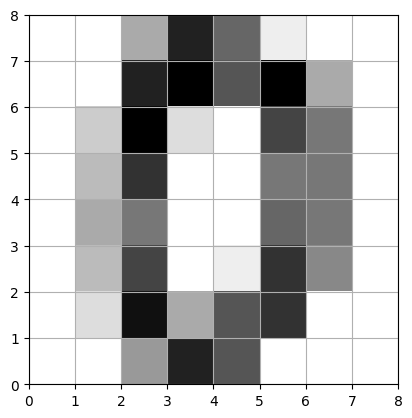

In [4]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.grid()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest', extent=(0, 8, 0, 8))

* Πριν προχωρήσουμε όμως, ας θυμηθούμε ότι μέχρι τώρα έχουμε δει ταξινομητές μεταξύ δύο κλάσεων.

* Εδώ όμως έχουμε 10 κλάσεις (μία για κάθε ψηφίο).

* Πώς μπορούμε να το χειριστούμε αυτό;

* Υπάρχουν δύο στρατηγικές για ταξινόμηση πολλαπλών κλάσεων (multi-class classification):

  * Μία-προς-Μία (One-versus-One, OvO)
  
  * Μία-προς-Όλες (One-versus-All, OvA ή One-versus-Rest, OvR).

* Στην στραγητική Μία-προς-Μία, αν έχουμε $K$ κλάσεις δημιουργούμε  $\binom{K}{2} = \frac{K(K-1)}{2}$ ταξινομητές.

* Κάθε ένας από αυτούς ταξινομεί κάθε δείγμα μεταξύ δύο κλάσεων.

* Μετράμε τα αποτελέσματα των ταξινομήσεων για κάθε δείγμα.

* Κάθε δείγμα θα πάρει την κλάση της πλειοψηφίας των ταξινομητών.

* Έστω ότι έχουμε πέντε κλάσεις C1, C2, C3, C4, C5.

* Θα κατασκευάσουμε 10 ταξινομητές.

* Να πώς θα μπορούσαν να ήταν τα αποτελέσματα για ένα δείγμα, το οποίο τελικά ταξινομούμε ως C2:

| Ταξινομήτης | Κλάση |
|-------------|-------|
|   C1, C2    |  C2   |
|   C1, C3    |  C1   |
|   C1, C4    |  C1   |
|   C1, C5    |  C5   |
|   C2, C3    |  C2   |
|   C2, C4    |  C2   |
|   C2, C5    |  C2   |
|   C3, C4    |  C4   |
|   C3, C5    |  C5   |
|   C4, C5    |  C4   |

* Στην στρατηγική Μία-προς-Όλες, για $K$ κλάσεις δημιουργούμε $K$ ταξινομητές.

* Κάθε ένας από αυτούς ταξινομεί κάθε δείγμα μεταξύ μιας κλάσης και όλων των υπολοίπων.

* Στο τέλος, για κάθε δείγμα επιλέγουμε την κλάση στην οποία ταξινομείται το δείγμα καλύτερα. Στην περίπτωση των Μηχανών Διανυσμάτων Στήριξης η επιλογή γίνεται με βάση την απόσταση από το υπερεπίπεδο που ορίζει ο κάθε επιμέρους ταξινομητής.

* Έστω ότι έχουμε πέντε κλάσεις C1, C2, C3, C4, C5.

* Κατασκευάζουμε πέντε ταξινομητές.

* Ο κάθε ταξινομητής δίνει μια τιμή που αντιστοιχεί στην πεποίθησή του για την εκάστοτε κλάση. Αν στο παράδειγμα οι τιμές είναι όπως στον παρακάτω πίνακα, το δείγμα θα ταξινομηθεί ως C3:

| Ταξινομητής  | Τιμή       |
|--------------|------------|
|   C1, Rest   |   0,7      |
|   C2, Rest   |   0,6      |
|   C3, Rest   |   0,8      |
|   C4, Rest   |   0,5      |
|   C5, Rest   |   0,4      |

* Θα χρησιμοποιήσουμε για ταξινομητή μας μία Μηχανή Διανυσμάτων Στήριξης.

* Η προεπιλεγμένη συνάρτηση πυρήνα χρησιμοποιεί την εκθετική συνάρτηση και δέχεται μια υπερπαράμετρο $\gamma$ η οποία πολλαπλασιάζει τον εκθέτη.

* Θα θέσουμε $\gamma = 0{,}001$.

* Επίσης θα θέσουμε $C = 100$.  H υπερπαράμετρος `C` ρυθμίζει την αυστηρότητα του περιθωρίου, όσο πιο μεγάλη η τιμή της τόσο πιο αυστηρός ο ταξινομητής.

In [5]:
from sklearn import svm

clf = svm.SVC(gamma=0.001, C=100.)

* Αφού κατασκευάσουμε τον ταξινομητή μας, πρέπει να τον εκπαιδεύσουμε.

* Η εκπαίδευση γίνεται με τη μέθοδο `fit()`.

* Αφού πρόκειται για επιβλεπόμενη εκμάθηση, στη μέθοδο `fit()` θα δώσουμε τα παραδείγματα και τις λύσεις τους.

* Ως δεδομένα εκμάθησης θα χρησιμοποιήσουμε όλα τα δείγματα εκτός από το τελευταίο, που θα κρατήσουμε για έλεγχο.

In [6]:
clf.fit(digits.data[:-1], digits.target[:-1]) 

,C,100.0
,kernel,'rbf'
,degree,3
,gamma,0.001
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


* Τώρα μπορούμε να προβλέψουμε την κλάση για ψηφία που δεν έχουμε δει.

* Στην περίπτωσή μας, ζητάμε από τον ταξινομητή να αποφανθεί για την κλάση της τελευταίας εικόνας των δεδομένων μας, η οποία δεν χρησιμοποιήθηκε στη φάση της εκπαίδευσης.

In [7]:
clf.predict(digits.data[-1:])

array([8])

* Για να δούμε τι ήταν:

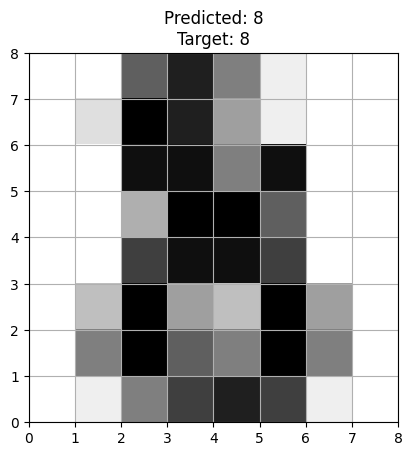

In [8]:
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, 
           interpolation='nearest', extent=(0, 8, 0, 8))
plt.grid()
_ = plt.title(f'Predicted: {clf.predict(digits.data[-1:])[0]}\nTarget: {digits.target[-1]}')

* Το θέμα είναι ότι για έλεγχο χρησιμοποιήσαμε ένα και μόνο ένα ψηφίο.

* Αυτό δεν είναι αρκετό για να μπορούμε να κρίνουμε την απόδοση του ταξινομητή μας.

* Πριν προχωρήσουμε, ας δούμε μερικά ακόμα από τα ψηφία που έχουμε για να ξέρουμε με τι είμαστε αντιμέτωποι.

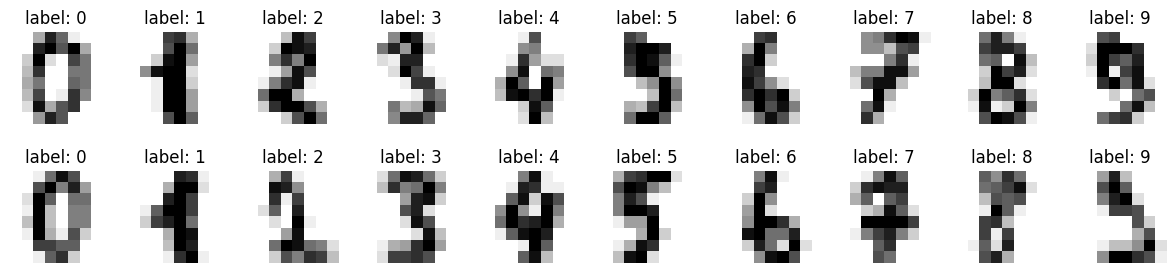

In [9]:
plt.figure(figsize=(10*1.5, 2*1.5))
images_and_labels = list(zip(digits.images, digits.target))
nrows, ncols = 2, 10
for index, (image, label) in enumerate(images_and_labels[:20]):
    plt.subplot(nrows, ncols, index+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'label: {label}')
plt.subplots_adjust(hspace=0.5)

* Θα φτιάξουμε έναν νέο ταξινομητή.

* Αυτή τη φορά θα αφήσουμε την παράμετρο `C` στην προκαθορισμένη τιμή (`C=1.0`), που σημαίνει ότι ο ταξινομητής μας θα είναι πιο χαλαρός.

In [10]:
classifier = svm.SVC(gamma=0.001)

* Θα χρησιμοποιήσουμε τα μισά ψηφία για εκπαίδευση.

In [11]:
half_samples = len(digits.images) // 2

classifier.fit(digits.data[:half_samples], digits.target[:half_samples])

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,0.001
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


* Και τα άλλα μισά ψηφία για εκμάθηση.

In [12]:
expected = digits.target[half_samples:]
predicted = classifier.predict(digits.data[half_samples:])

* Μπορούμε να εμφανίσουμε κάποια από τα ψηφία, τις προβλέψεις, και τον στόχο κάθε φορά, ώστε να πάρουμε μια ιδέα για το πώς τα πήγε ο ταξινομητής.

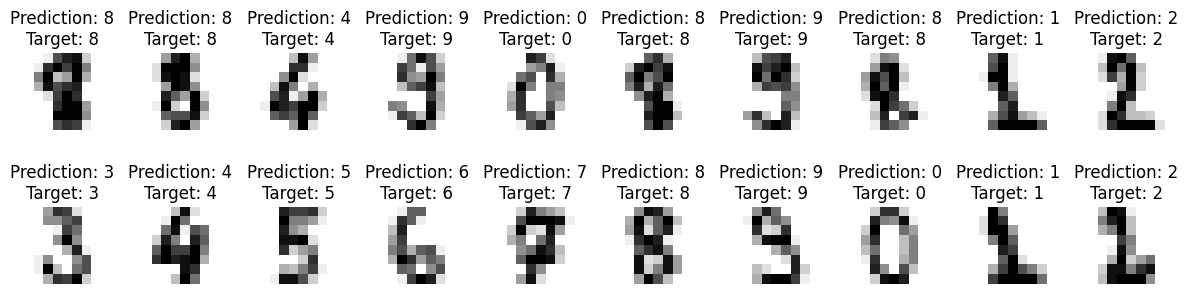

In [13]:
plt.figure(figsize=(10*1.5, 2*1.5))
images_predictions_targets = list(zip(digits.images[half_samples:], predicted, expected))
for index, (image, prediction, target) in enumerate(images_predictions_targets[:20]):
    plt.subplot(nrows, ncols, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Prediction: {prediction}\nTarget: {target}')
plt.subplots_adjust(hspace=1)

* Βέβαια δεν μπορούμε στην πράξη να κρίνουμε έτσι με το μάτι την αποτελεσματκότητα ενός ταξινομητή.

* Για το σκοπό αυτό χρησιμοποιούμε συγκεκριμένες μετρικές.

* Ο πιο πρόσφορος τρόπος να τις δούμε είναι η *αναφορά ταξινόμησης* (classification report):

In [14]:
from sklearn import metrics

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




* Ας πιάσουμε ένα-ένα τα περιεχόμενα του πίνακα.

* Η *στήριξη* (support) είναι ο αιρθμός των δειγμάτων σε κάθε κλάση.

* Για να καταλάβουμε τις υπόλοιπες μετρικές, θα χρειαστούμε τα παρακάτω μεγέθη:

  * TP, True Positive, Αληθώς Θετικά
  * TN, True Negative, Αληθώς Αρνητικά
  * FP, False Positive, Ψευδώς Θετικά
  * FN, False Negative, Ψευδώς Αρνητικά
  * P, Positive, όλα τα θετικά στον πληθυσμό
  * N, Negative, όλα τα αρνητικά τον πληθυσμό

* Η *ορθότητα* (accuracy) μας δίνει το ποσοστό των σωστών προβλέψεων και ορίζεται:

$$ \frac{\textrm{TP} + \textrm{TN}}{\textrm{Sample Size}} $$

* Μπορούμε να την πάρουμε με τη μέθοδο `accuracy_score()`.

In [15]:
metrics.accuracy_score(expected, predicted)

0.9688542825361512

* Η ορθότητα εμφανίζεται στο κάτω μέρος της αναφοράς ταξινόμησης.

In [16]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



* Η *ακρίβεια* (precision) μας δίνει το ποσοστό των ορθών θετικών ως προς όλα όσα προβλέψαμε θετικά.

* Ορίζεται ως:

$$\frac{\textrm{TP}}{\textrm{TP} + \textrm{FP}} = \frac{\textrm{TP}}{\textrm{All Positive Predictions}}$$

* Μπορούμε να την πάρουμε με τη μέθοδο `precision_score()`.

* Στην περίπτωση που έχουμε ταξινόμηση πολλών κλάσεων, για να πάρουμε την ακρίβεια της κάθε κλάσης πρέπει να δώσουμε την παράμετρο `average=None`.

In [17]:
metrics.precision_score(expected, predicted, average=None)

array([1.        , 0.98876404, 0.98837209, 0.97530864, 0.98876404,
       0.94623656, 0.98901099, 0.95652174, 0.93617021, 0.92783505])

* Αν θέλουμε να πάρουμε τον μέσο όρο της ακρίβειας, μπορούμε να δώσουμε την παράμετρο `average='macro'`.

In [18]:
metrics.precision_score(expected, predicted, average='macro')

0.9696983376479764

* Εναλλακτικά, μπορούμε να δώσουμε την παράμετρο `average='weighted'`, οπότε παίρνουμε το μέσο όρο από τις ακρίβειες για κάθε κλάση προσαρμοσμένο ως προς τη στήριξη της κάθε κλάσης, δηλαδή τον σταθμισμένο μέσο όρο (weighted average).

* Αυτός μπορεί να διαφέρει από τον απλό μέσο όρο στην περίπτωση που τα δεδομένα μας είναι ετεροβαρή (imbalanced) και υπάρχει διαφορά στην αντιπροσώπευση μεταξύ των κλάσεων.

In [19]:
metrics.precision_score(expected, predicted, average='weighted')

0.9696092010839529

* Η ακρίβεια, και οι δύο μέσοι όροι, είναι η πρώτη στήλη της αναφοράς ταξινόμησης. 

In [20]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



* Η *ανάκληση* (recall) μας δίνει το ποσοστό των ορθών θετικών ως προς όλα τα θετικά που θα έπρεπε να προβλέψουμε.

* Ορίζεται ως:

$$\frac{\textrm{TP}}{\textrm{TP} + \textrm{FN}} = \frac{\textrm{TP}}{\textrm{P}}$$

* Μπορούμε να την πάρουμε με τη μέθοδο `recall_score()`, με αντίστοιχες παραμέτρους της `precision_score()`.

In [21]:
print(metrics.recall_score(expected, predicted, average=None))
print(metrics.recall_score(expected, predicted, average='macro'))
print(metrics.recall_score(expected, predicted, average='weighted'))


[0.98863636 0.96703297 0.98837209 0.86813187 0.95652174 0.96703297
 0.98901099 0.98876404 1.         0.97826087]
0.9691763901507882
0.9688542825361512


* Η ανάκληση εμφανίζεται στη δεύτερη στήλη της αναφοράς ταξινόμησης.

In [22]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



* Η ακρίβεια και η ανάκληση είναι ιδιαιτέρως σημαντικά σε ετεροβαρή δεδομένα.

* Έστω ότι τα δεδομένα μας ανήκουν σε δύο κλάσεις (θετικά και αρνητικά), και ότι 99,99% είναι αρνητικά και 0,01% είναι θετικά.

* Τότε ένας ταξινομητής ο οποίος δεν ξέρει τίποτε, παρά να λέει πάντα όχι, θα έχει ορθότητα 99,99%!

* Αλλά θα είναι παντελώς άχρηστος.

* Ένας τέτοιος ταξινομητής όμως θα είχε $\textrm{TP} = 0$, άρα θα είχε ακρίβεια και ανάκληση μηδέν.

* Από την άλλη, η ακρίβεια και η ανάκληση μετρούν διαφορετικά πράγματα.

* Αν φτιάξουμε έναν πολύ αυστηρό ταξινομητή που εντοπίζει μόνο ένα ορθώς θετικό δείγμα, η ακρίβεια θα είναι 100% γιατί $\textrm{TP} = 1$ και $\textrm{FP} = 0$, αλλά η ανάκληση θα είναι αβυσσαλέα.

* Αν φτιάξουμε έναν πολύ επιεική ταξινομητή που τα βγάζει όλα θετικά, η ανάκληση θα είναι 100% γιατί  $\textrm{FN} = 0$, αλλά η ακρίβεια θα είναι αβυσσαλέα.

* Η μετρική $F_1$ συνδυάζει την ακρίβεια και την ανάκληση.

* Μαθηματικά, είναι ο *αρμονικός μέσος* της ακρίβειας και της ανάκλησης.

* Ο αρμονικός μέσος $n$ αριθμών $x_1, x_2, \ldots, x_n$ ορίζεται ως:

$$H={\frac {n}{{\frac {1}{x_{1}}}+{\frac {1}{x_{2}}}+\cdots +{\frac {1}{x_{n}}}}}$$

* Έτσι, η μετρική $F_1$ είναι:

$$F_{1}=2\cdot \frac{1}{\tfrac{1}{\mathrm{precision}}+\tfrac{1}{\mathrm{recall}}} = 2\cdot {\frac{\mathrm{precision} \cdot \mathrm{recall}}{\mathrm{precision} +\mathrm{recall}}}$$

* Χρησιμοποιούμε την μετρική $F_1$ αντί για τον απλό μέσο όρο γιατί τιμωρεί τις ακραίες τιμές.

* Αν είτε η ανάκληση είτε η ακρίβεια είναι μηδέν, η μετρική $F_1$ θα είναι μηδέν.

* Ένας άλλος τρόπος να αποτιμήσουμε τα αποτελέσματα είναι μέσω του *πίνακα σύγχισης* (confusion matrix):

In [23]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


* Ο πίνακας σύγχισης μπορεί να οπτικοποιηθεί μέσω της `ConfusionMatrixDisplay.from_estimator()` ή `ConfusionMatrixDisplay.from_predictions()`.

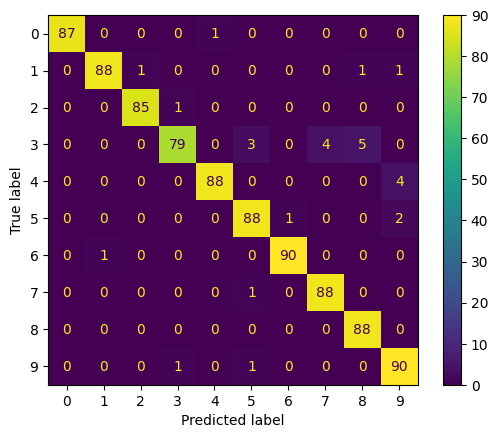

In [24]:
_ = metrics.ConfusionMatrixDisplay.from_estimator(classifier, 
                                                  digits.data[half_samples:], 
                                                  digits.target[half_samples:])

* Προσέξτε κάτι: και στην στατιστική μπορούμε (όπως είδαμε) να προβλέψουμε τιμές με βάση τα δεδομένα μας.

* Στην στατιστική ο σκοπός μας όμως είναι άλλος: να *εξηγήσουμε* τα δεδομένα μας, φτιάχνοντας ένα μοντέλο.

* Το μοντέλο το αποτιμούμε χρησιμοποιώντας στατιστικούς ελέγχους.

* Στη Μηχανική Μάθηση, ο σκοπός μας δεν είναι να εξηγήσουμε τα δεδομένα μας. Είναι να τα χρησιμοποιήσουμε για να κάνουμε προβλέψεις.

* Εξού και οι μετρικές που χρησιμοποιούμε για την αξιολόγηση των αποτελεσμάτων μας.